# Cardiovascular Disease Dataset Analysis
## Task 1A – Part 2
### 1. Summary Statistics and Initial Exploration

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("32130_AT2_25544685.csv")

# Show the first few rows
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,46234,23377,1,167,79.0,120,80,1,1,No,No,Yes,No
1,30227,20590,1,158,52.0,110,70,1,1,No,No,Yes,No
2,65712,21748,2,178,84.0,110,80,1,1,No,Yes,Yes,No
3,49223,17263,2,157,70.0,130,80,3,3,No,No,Yes,No
4,70961,16160,2,178,75.0,120,70,1,1,No,No,Yes,No


## Attribute Overview
The dataset contains 13 attributes including identifiers, numerical values (e.g., age, height, weight, blood pressure), and categorical values (e.g., gender, smoke, cardio). We begin by calculating descriptive statistics.

In [3]:
# Basic stats with percentiles
basic_stats = df.describe(include='all', percentiles=[.01, .25, .5, .75, .99])

# Additional stats (numeric only)
median_vals = df.median(numeric_only=True)
mode_vals = df.mode(numeric_only=True).iloc[0]
variance_vals = df.var(numeric_only=True)
range_vals = df.max(numeric_only=True) - df.min(numeric_only=True)

# Combine extra stats
extra_stats = pd.DataFrame({
    'median': median_vals,
    'mode': mode_vals,
    'variance': variance_vals,
    'range': range_vals
}).T

# Combine all stats into one table
full_summary = pd.concat([basic_stats, extra_stats], sort=False)

# Clean formatting: round + replace NaN with 'NA'
full_summary = full_summary.astype("object").round(0).fillna("NA")

# Display full summary
full_summary

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,11200.0,11200.0,11200.0,11200.0,11200.0,11200.0,11200.0,11200.0,11200.0,11200,11200,11200,11200
unique,NA,NA,NA,NA,NA,NA,NA,NA,NA,2,2,2,2
top,NA,NA,NA,NA,NA,NA,NA,NA,NA,No,No,Yes,No
freq,NA,NA,NA,NA,NA,NA,NA,NA,NA,10218,10623,9002,5603
mean,49910.040089,19476.409821,1.348393,164.301875,74.378357,127.445089,96.695536,1.368214,1.220982,NA,NA,NA,NA
std,28985.04069,2465.278082,0.476482,8.470095,14.562783,33.93094,176.839932,0.678361,0.565558,NA,NA,NA,NA
min,0.0,14292.0,1.0,60.0,29.0,-140.0,0.0,1.0,1.0,NA,NA,NA,NA
1%,959.96,14461.0,1.0,146.0,48.0,90.0,60.0,1.0,1.0,NA,NA,NA,NA
25%,24678.75,17673.0,1.0,159.0,65.0,120.0,80.0,1.0,1.0,NA,NA,NA,NA
50%,50048.0,19704.5,1.0,165.0,72.0,120.0,80.0,1.0,1.0,NA,NA,NA,NA


## Summary Observations
- `ap_hi` (systolic blood pressure) has a **minimum value of -140**, which is medically invalid and likely due to a data entry error.
- `weight` ranges from **29 kg to 200 kg**, with most values between 60–90 kg.
- Categorical attributes like `smoke`, `alco`, and `active` appear to be **highly imbalanced**, with 'No' being the dominant response.
These findings will be explored further in the next section.

# 2. Visualizing Numerical Attributes

# Visualization: Age (in Years)

## Histogram for `age` (Converted from Days to Years)

The distribution of the `age` attribute was visualized after converting it from **days to years** for better interpretability. This histogram allows us to observe the **overall spread**, **central tendency**, and the **concentration of age groups** in the dataset.

The histogram helps identify whether the sample is balanced across age groups and whether any data irregularities exist.

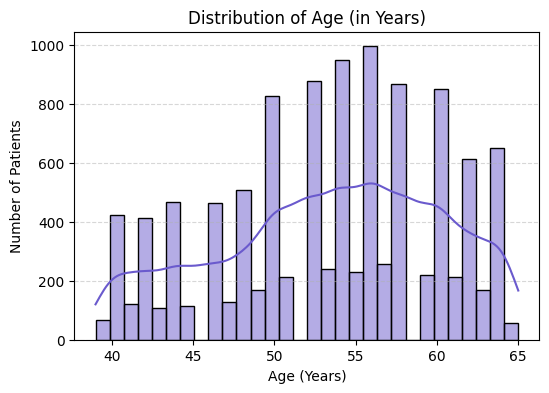

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert age from days to years (rounded)
df['age_years'] = (df['age'] / 365).round()

# Histogram of age (in years)
plt.figure(figsize=(6, 4))
sns.histplot(df['age_years'], bins=30, kde=True, color='slateblue')
plt.title('Distribution of Age (in Years)')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Observations for `age` (in Years)

- The `age` attribute was originally recorded in days and has been converted to years for easier interpretation.
- The histogram shows that most patients are between **50 and 60 years old**, with the highest concentration around **54–56 years**.
- The distribution appears **fairly symmetric**, without strong skewness, suggesting that the dataset covers a balanced age range in the middle adulthood period.
- According to the summary statistics:
  - The **mean age** is approximately **53.4 years**.
  - The **median and mode** are both around **54 years**, supporting the visual symmetry.
  - The **range** of ages is from **39 to 65 years**, and the **standard deviation** is about **6.8**, indicating moderate variation.
- There are **no extreme outliers** in the age data, and the values appear to be within a valid and realistic range for adult patients.
- Overall, the age attribute is clean, well-distributed, and does not raise any data quality concerns.


# Visualization: Systolic Blood Pressure (`ap_hi`)

## Boxplot for `ap_hi` (Systolic Blood Pressure)

A boxplot was created for the `ap_hi` attribute to explore the distribution and identify potential outliers. Systolic blood pressure typically ranges from 90 to 180 mmHg in healthy adults. Any values outside this range are likely to be either extreme medical conditions or data entry errors.

Note: Although the dataset does not explicitly mention units for `ap_hi`, the values align with typical systolic blood pressure measured in millimetres of mercury (mmHg). Therefore, it is assumed that `ap_hi` is expressed in mmHg, which is standard in medical contexts.

The boxplot clearly shows how most values fall within a reasonable range, but also highlights the presence of invalid or extreme values, such as negative blood pressure or unusually high readings.

This chart helps identify such records and justifies the need for data cleaning in later analysis.

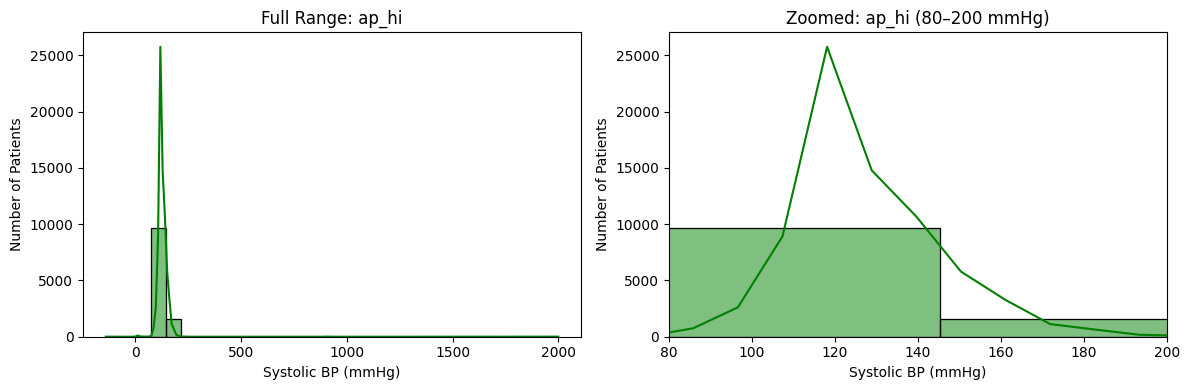

In [19]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

# Full-range histogram
sns.histplot(df['ap_hi'], bins=30, kde=True, color='green', ax=axes[0])
axes[0].set_title('Full Range: ap_hi')
axes[0].set_xlabel('Systolic BP (mmHg)')
axes[0].set_ylabel('Number of Patients')

# Zoomed-in histogram
sns.histplot(df['ap_hi'], bins=30, kde=True, color='green', ax=axes[1])
axes[1].set_xlim(80, 200)
axes[1].set_title('Zoomed: ap_hi (80–200 mmHg)')
axes[1].set_xlabel('Systolic BP (mmHg)')
axes[1].set_ylabel('Number of Patients')

plt.tight_layout()
plt.show()

## Comparison of Full vs Zoomed Histogram of `ap_hi` (Systolic Blood Pressure)

Two histograms are shown side by side: the **left displays the full `ap_hi` distribution**, including extreme outliers that stretch the x-axis and distort the main cluster. The **right zooms in on the 80–200 range**, revealing the core distribution more clearly. This combined view highlights both the overall spread and potential data entry errors, while also making the typical value range and distribution shape easier to interpret.


### Observations:
- The **majority of values** fall within the **100–160** range, forming a **sharp peak** that indicates a large concentration around a narrow interval.
- The distribution is **right-skewed**, with values gradually decreasing beyond the peak.
- A few entries exist **below 80** and others exceed **200**, which stretch the distribution significantly.
- The summary statistics confirm this spread, with a **median and mode of 120**, but an extreme **range of 2140**, from **-140 (min)** to **2000 (max)**.
- These extreme values are most likely **input errors or anomalies**, given how far they fall outside the 1st and 99th percentiles (90 and 180 respectively).
- The zoomed histogram offers a much clearer view of the **actual shape and frequency** distribution while still keeping all data intact.


## Comparison of Full vs Zoomed Histogram of `ap_lo` (Diastolic Blood Pressure)

Two histograms are presented side by side to analyze the distribution of `ap_lo` (diastolic blood pressure). The full-range histogram (left) includes all values, including extreme outliers that stretch the axis and compress the core distribution.

The zoomed-in histogram (right) focuses on the 40–120 range, where most data points are concentrated. This comparison improves interpretability without modifying the dataset and helps highlight the central tendencies and potential anomalies within the `ap_lo` attribute.

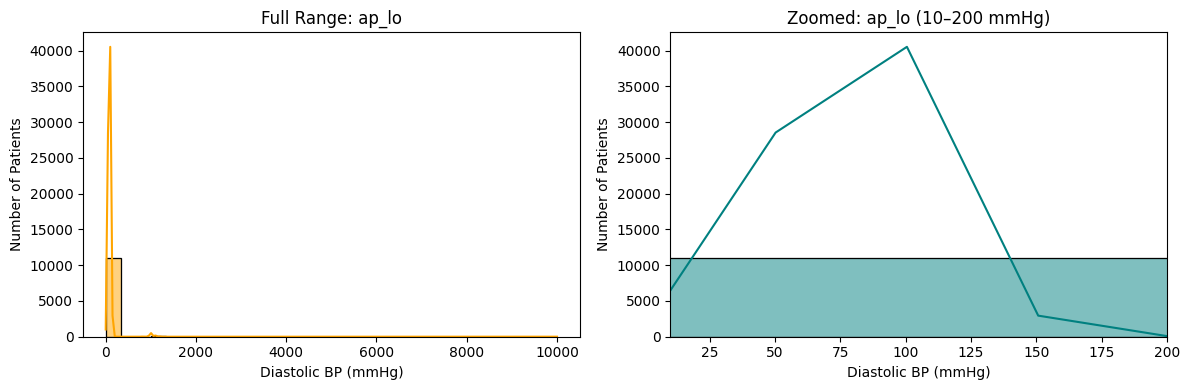

In [32]:
# Side-by-side histograms: full and zoomed-in for ap_lo
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

# Full-range histogram
sns.histplot(df['ap_lo'], bins=30, kde=True, color='orange', ax=axes[0])
axes[0].set_title('Full Range: ap_lo')
axes[0].set_xlabel('Diastolic BP (mmHg)')
axes[0].set_ylabel('Number of Patients')

# Zoomed-in histogram
sns.histplot(df['ap_lo'], bins=30, kde=True, color='teal', ax=axes[1])
axes[1].set_xlim(10, 200)
axes[1].set_title('Zoomed: ap_lo (10–200 mmHg)')
axes[1].set_xlabel('Diastolic BP (mmHg)')
axes[1].set_ylabel('Number of Patients')

plt.tight_layout()
plt.show()

### Observations for `ap_lo` (Diastolic Blood Pressure)

- The **full-range histogram** shows that while most values are concentrated within a smaller range, a few **extremely high values** stretch the x-axis, making the central distribution harder to interpret.
- The **zoomed-in histogram (10–200 mmHg)** provides a clearer view of the distribution, which shows a **gradual rise**, peaking between **90–100**, followed by a quicker drop.
- According to the summary statistics:
  - The **median and mode** are both **80**, while the **mean is 96.7**, indicating that the **overall distribution is right-skewed** due to a small number of large values pulling the average upward.
  - The **standard deviation (176.8)** and **range (10,000)** are disproportionately large, which further confirms the impact of these extreme values — even if they aren’t common or visually dominant.
- This combination of visuals and statistics indicates potential **data quality issues** in `ap_lo`, possibly caused by **inconsistent or incorrect data entries**, which may need to be reviewed or cleaned before modeling.


# Visualization: Height (in cm)

## Distribution and Outlier Detection for `height`

A **histogram** and a **boxplot** are both used to analyze the `height` attribute. Height is a ratio-type numeric variable measured in centimeters. The histogram helps us understand the **overall distribution and frequency**, while the boxplot highlights **central tendency and outliers**.

This combination allows for a more complete view of the attribute's behavior and potential anomalies.


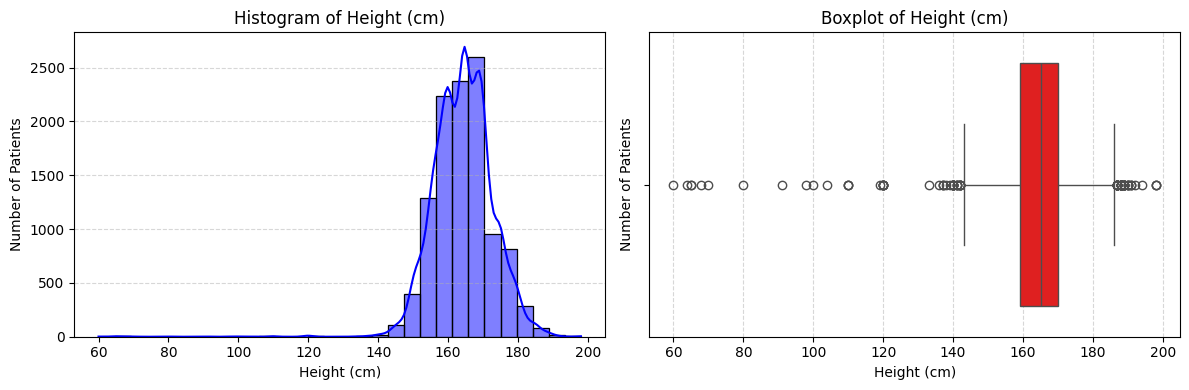

In [33]:
# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
sns.histplot(df['height'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram of Height (cm)')
axes[0].set_xlabel('Height (cm)')
axes[0].set_ylabel('Number of Patients')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Boxplot
sns.boxplot(x=df['height'], color='red', ax=axes[1])
axes[1].set_title('Boxplot of Height (cm)')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Number of Patients')
axes[1].grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### Observations for `height` (in cm)

- The histogram shows that most patients have a height between **155 and 175 cm**, with a clear peak around **165–168 cm**.
- The distribution appears bell-shaped and symmetric, with the mean, median, and mode closely aligned — indicating a normal distribution with no noticeable skewness.
- The boxplot confirms that the majority of values fall within a tight range, but also highlights several **outliers**, specifically values **below ~143 cm** and **above ~187 cm**. These are beyond the 1.5×IQR range and may indicate unusually short/tall individuals or potential data entry issues.
- According to the summary statistics:
  - The **mean height** is **164.3 cm**
  - The **median and mode** are both **165 cm**
  - The **standard deviation** is **8.47**, and the **range** spans from **60 cm to 198 cm**
- These values indicate a **moderate spread**, with the dataset being generally centered around the median.
- The extremely low values (e.g. **60 cm**) are **far outside the typical human adult range**, which further suggests possible **data entry errors**.
- Overall, the `height` attribute is mostly clean and normally distributed, with a small number of **clear outliers** that should be reviewed during data preprocessing.



# Visualization: Weight (in kg)

## Distribution and Outlier Detection for `weight`

The `weight` attribute represents each patient's body weight in kilograms and is a ratio-type numeric variable. A **histogram** is used to show the distribution and frequently occurring values, while a **boxplot** helps identify any potential outliers.

This combination provides a full picture of the central tendency, variation, and possible data entry issues for this attribute.


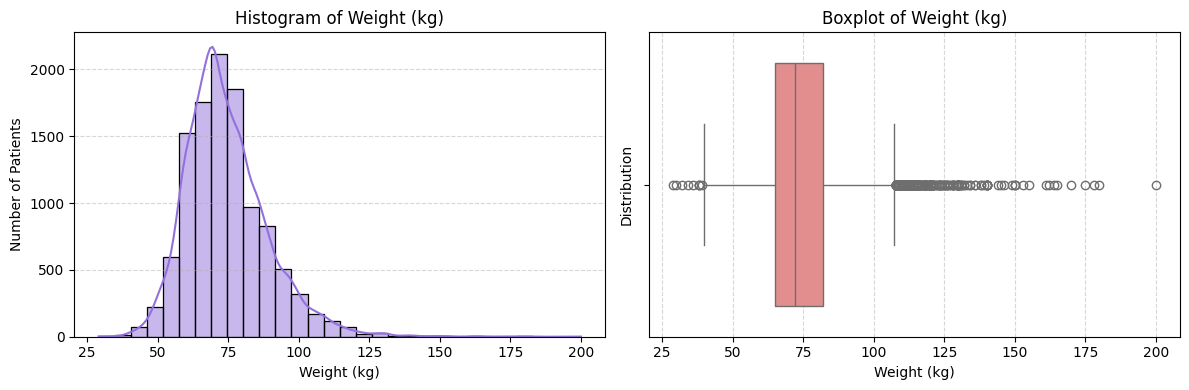

In [34]:
# Plot side-by-side histogram and boxplot for weight
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
sns.histplot(df['weight'], bins=30, kde=True, color='mediumpurple', ax=axes[0])
axes[0].set_title('Histogram of Weight (kg)')
axes[0].set_xlabel('Weight (kg)')
axes[0].set_ylabel('Number of Patients')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Boxplot
sns.boxplot(x=df['weight'], color='lightcoral', ax=axes[1])
axes[1].set_title('Boxplot of Weight (kg)')
axes[1].set_xlabel('Weight (kg)')
axes[1].set_ylabel('Distribution')  # Optional label
axes[1].grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### Observations for `weight` (in kg)

- The histogram shows that most patients weigh between **60 and 85 kg**, with a peak around **70–75 kg**.
- The distribution is **slightly right-skewed**, meaning more patients have weights below the mean, and the higher values extend the tail gently to the right.
- The boxplot confirms this skew by highlighting multiple **outliers**, especially:
  - Values **below 39.5 kg**
  - Values **above 107.5 kg**
- According to the summary statistics:
  - The **mean weight** is **74.4 kg**
  - The **median** is **72 kg**, and the **mode** is **65 kg**
  - The **standard deviation** is **14.56**, and the **range** spans from **29 kg to 200 kg**
- The difference between the mean and median, and the presence of a longer right tail, support the observation of **mild right skewness**.
- The **extreme values**, particularly below **40 kg** and above **110 kg**, may reflect **atypical measurements or possible data entry issues** and should be reviewed further during preprocessing.
- Overall, the `weight` attribute has a reasonable distribution with some **outliers** at both ends, especially on the higher side.


## 3.1 Visualizing Ordinal Attributes

### Cholesterol Levels

The `cholesterol` attribute is an ordinal variable with 3 levels:
- 1 = Normal
- 2 = Above Normal
- 3 = Well Above Normal

A bar chart is used to show the distribution of cholesterol values across the dataset and to identify any imbalances in category representation.


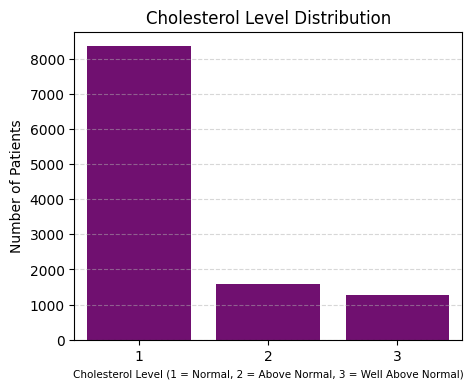

In [49]:
plt.figure(figsize=(5, 4))
sns.countplot(x='cholesterol', data=df, color='purple')
plt.title('Cholesterol Level Distribution')
plt.xlabel('Cholesterol Level (1 = Normal, 2 = Above Normal, 3 = Well Above Normal)', fontsize=7.5)
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Observations for `cholesterol`

- Out of 11,200 patients:
  - **8,350 (73.7%)** have a cholesterol level of **1 (Normal)**
  - **1,576 (15.1%)** have a level of **2 (Above Normal)**
  - **1,274 (11.2%)** have a level of **3 (Well Above Normal)**
- This shows a **strong class imbalance**, with the vast majority of patients falling into the normal category.
- The distribution follows a clear ordinal trend, declining from category 1 to 3.
- While this is expected in real-world health datasets, the imbalance should be considered in any **predictive modeling**, as it may lead to biased classification.
- All values fall within the expected scale (1–3), with no invalid or missing entries — confirming that the attribute is clean and well-defined for both **descriptive and predictive analysis**.


### Glucose Levels

The `gluc` attribute represents a patient's glucose level and is an ordinal variable with 3 levels:
- 1 = Normal
- 2 = Above Normal
- 3 = Well Above Normal

A bar chart is used to visualize the distribution to identify the class balance and assess whether this attribute is well-suited for analysis or predictive modeling.


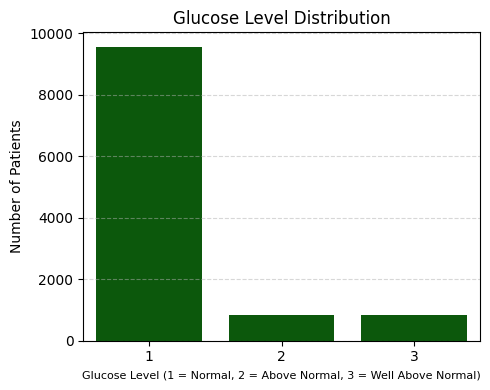

In [52]:
plt.figure(figsize=(5, 4))
sns.countplot(x='gluc', data=df, color='darkgreen')
plt.title('Glucose Level Distribution')
plt.xlabel('Glucose Level (1 = Normal, 2 = Above Normal, 3 = Well Above Normal)', fontsize=8)
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Observations for `gluc` 

- Out of 11,200 patients:
  - **9,552 (85.2%)** have a glucose level of **1 (Normal)**
  - **821 (7.6%)** are at **2 (Above Normal)**
  - **827 (7.2%)** are at **3 (Well Above Normal)**
- Similar to `cholesterol`, this attribute also shows a **strong class imbalance**, with the vast majority of patients classified as normal.
- The distribution follows a **descending ordinal pattern**, but categories 2 and 3 are nearly equal in count.
- Although valid and consistent, this imbalance should be addressed in **predictive modeling**, as models may become biased toward predicting the dominant class (Normal).
- There are no missing or invalid entries in the `gluc` attribute — all values fall within the expected scale (1–3), confirming it is well-formatted for both **descriptive and predictive purposes**.


## 3.2 Grouped Visualization of Nominal Binary Attributes

The binary nominal attributes `gender`, `smoke`, `alco`, and `active` were grouped, each having only two categories. A grouped bar chart allows us to quickly observe class distributions and identify any imbalances.

These features may have significant influence on cardiovascular risk and are useful for downstream modeling and correlation analysis.


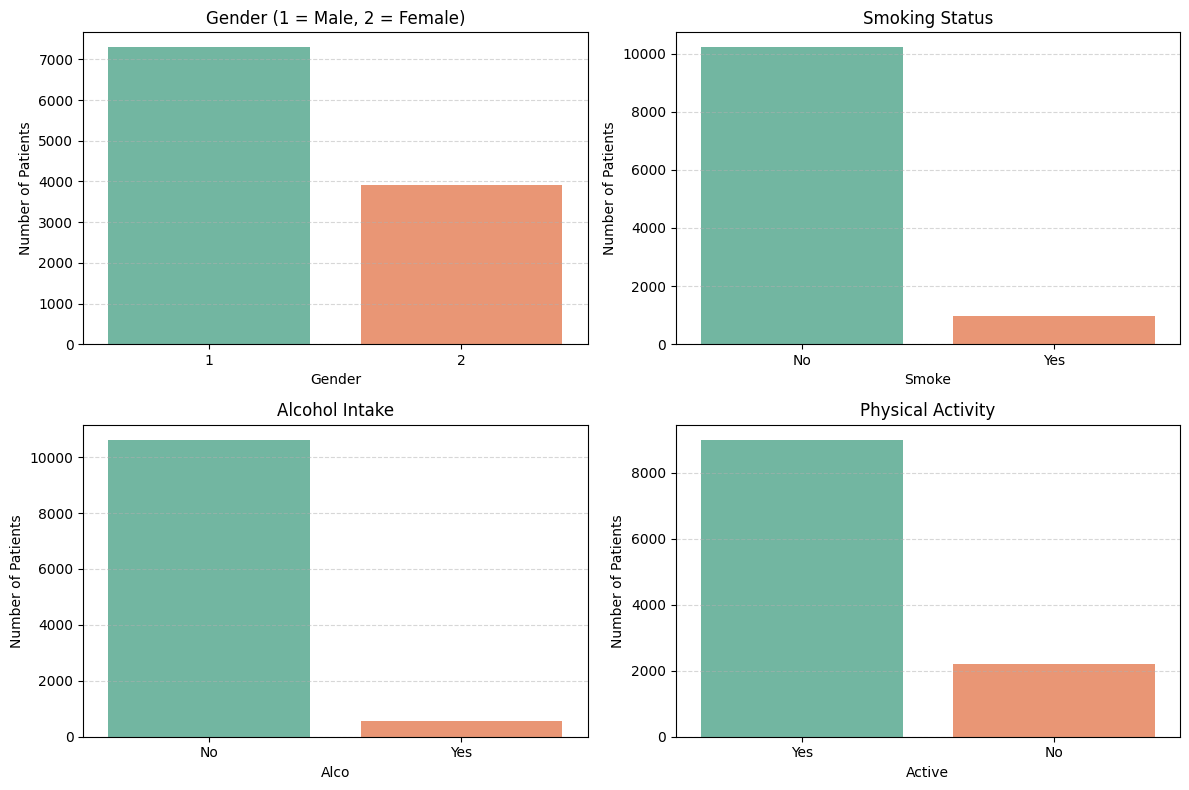

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure with 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
binary_vars = ['gender', 'smoke', 'alco', 'active']
titles = ['Gender (1 = Male, 2 = Female)', 'Smoking Status', 'Alcohol Intake', 'Physical Activity']

for ax, var, title in zip(axes.flat, binary_vars, titles):
    sns.countplot(x=var, data=df, ax=ax, hue=var, palette='Set2', legend=False)
    ax.set_title(title)
    ax.set_xlabel(var.capitalize())
    ax.set_ylabel('Number of Patients')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### Observations for Grouped Nominal Binary Attributes

#### 1. Gender
- Out of 11,200 patients:
  - **7,298 (65.2%)** are **male**
  - **3,902 (34.8%)** are **female**
- There is a noticeable gender imbalance, with a significantly larger male population.

#### 2. Smoking Status (`smoke`)
- **10,218 (91.2%)** reported **not smoking**
- Only **982 (8.8%)** reported **smoking**
- The skew suggests that smoking is relatively rare in this dataset.

#### 3. Alcohol Intake (`alco`)
- **10,623 (94.8%)** reported **no alcohol use**
- **577 (5.2%)** reported **alcohol consumption**
- This imbalance may affect feature importance during modeling if not properly handled.

#### 4. Physical Activity (`active`)
- **9,002 (80.4%)** of patients reported being **physically active**
- **2,198 (19.6%)** were **not active**
- The dataset leans toward active individuals, which might reflect a health-conscious sample or reporting bias.

### **Summary**
- All binary attributes show **imbalanced distributions**, particularly `alco` and `smoke`, followed by `active`.
- These imbalances may influence downstream analysis or model training and should be considered during feature engineering or sampling.


## 3.3 Visualizing the Target Variable: `cardio`

The `cardio` attribute is a binary nominal variable and serves as the **target** for classification in this dataset. It indicates whether or not a patient has been diagnosed with cardiovascular disease.

Understanding the **class balance** in the target variable is essential before applying any predictive modeling techniques, as severe imbalance can bias results and lead to poor generalization.


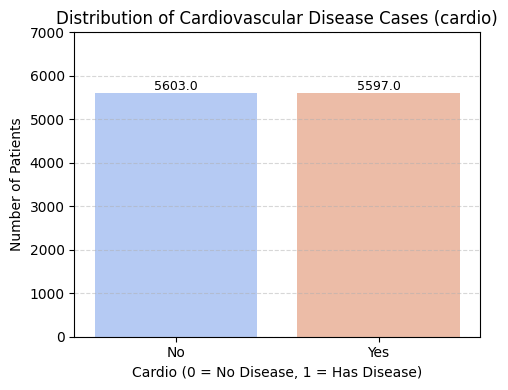

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
ax = sns.countplot(x='cardio', data=df, hue='cardio', palette='coolwarm', legend=False)
plt.title('Distribution of Cardiovascular Disease Cases (cardio)')
plt.xlabel('Cardio (0 = No Disease, 1 = Has Disease)')
plt.ylabel('Number of Patients')
plt.ylim(0, 7000)  # Set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()


### Observations for `cardio` (Target Attribute)

- The `cardio` attribute indicates whether a patient has been diagnosed with cardiovascular disease:
  - **0 (No Disease):** 5,603 patients (**50.03%**)
  - **1 (Has Disease):** 5,597 patients (**49.97%**)
- The distribution is **almost perfectly balanced**, with a difference of only 6 records between the two classes.
- This balance is highly desirable for predictive modeling, as it avoids common issues like biased classifiers or the need for resampling techniques.
- There are no missing or invalid values, and the binary values are clearly defined, making this target suitable for classification models.
